# Stable spiral
We have a stable spiral if $\left(\frac{pR_0}{2}-1\right)^2 + (p-1) < 0$, otherwise have have a stable node

In [1]:
(x,y,t) = var('x,y,t')
p=0.5
R_0=2
equilibria = [(1,0),(1/R_0, p*(1-1/R_0))]
save_location="../images/SIR-demographic-phase-plane.svg"

In [2]:
def find_solution(initial):
    # https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/ode.html
    T= ode_solver(lambda t,y: [p*(1-y[0]) - R_0 * y[0]*y[1], R_0*y[0]*y[1] - y[1]],
                  t_span=(0,30), y_0=initial,
                 )
    T.ode_solve(num_points=1000)
    return [p[1] for p in T.solution] # extract x,y coordinates only
initials = [
    (0,0.01), (0,0.03), (0,0.05), (0,0.07),
    (0,0.1), (0,0.2), (0,0.3), (0,0.4), (0,0.5),
    (1.5, 0.001), (1.5, 0.01), (1.5, 0.05), (1.5, 0.1), (1.5, 0.2), (1.5, 0.3), (1.5, 0.5),
]
solutions = [find_solution(initial) for initial in initials]

In [3]:
solutions[0][:10]

[(0, 0.0100000000000000),
 [0.014883693191854605, 0.009708800705594762],
 [0.029537504909403663, 0.009434437311595973],
 [0.043965445302695354, 0.00917582902358913],
 [0.058171412683222866, 0.00893197873031985],
 [0.07215919996884117, 0.008701965786831854],
 [0.08593250055198566, 0.00848493948800001],
 [0.09949491365174115, 0.008280113160480513],
 [0.11284994920335185, 0.008086758809243677],
 [0.12600103233268953, 0.007904202261977073]]

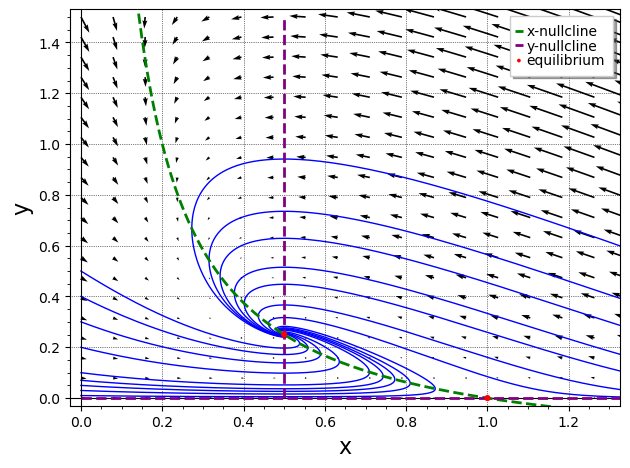

In [4]:
pt = plot_vector_field(
    [p*(1-x)-R_0*x*y, R_0*x*y-y],
    (x, 0, 1.5),(y, 0, 1.5),
    xmin=0, xmax=1.3, ymin=0, ymax=1.5, gridlines=True,
    axes_labels=[x,y],
)
pt += plot(p*(1-x) / R_0 / x, (x,0.001,1.5), linestyle="--", thickness=2, color="green", legend_label="x-nullcline", zorder=5)
pt += plot(0, (x,0.001,1.5), linestyle="--", thickness=2, color="purple", legend_label="y-nullcline", zorder=5)
pt += parametric_plot((1/R_0, y), (y,0,1.5), linestyle="--", xmin=0.001, thickness=2, color="purple", zorder=5)
pt += sum(point(p, color='red', size=20, zorder=10, **({"legend_label":"equilibrium"} if i==0 else {})) for i,p in enumerate(equilibria))
pt += sum(line(s) for s in solutions)
pt.set_aspect_ratio(1/1.6)
pt.save(save_location)
pt

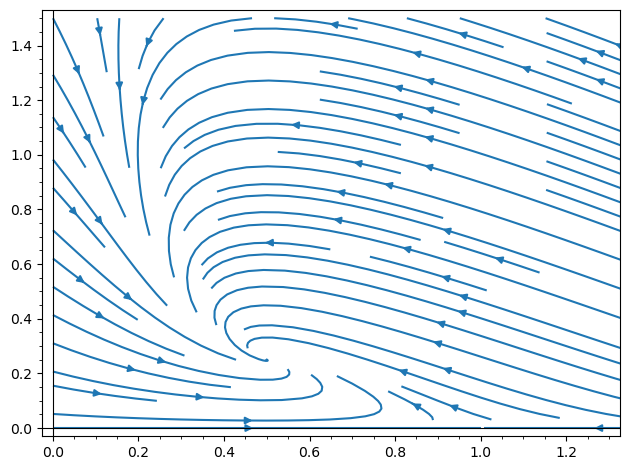

In [5]:
# cool looking
streamline_plot(
    [p*(1-x)-R_0*x*y, R_0*x*y-y],
    (x, 0, 1.5),(y, 0, 1.5),
    xmax=1.3
)

# Stable node (sink)
We have a sink if $\left(\frac{pR_0}{2}-1\right)^2 + (p-1) > 0$

In [6]:
(x,y,t) = var('x,y,t')
p=3/4
R_0=5
equilibria = [(1,0),(1/R_0, p*(1-1/R_0))]
save_location="../images/SIR-demographic-phase-plane-sink.svg"
(p*R_0/2-1)^2 + p-1

33/64

In [7]:
def find_solution(initial):
    # https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/ode.html
    T= ode_solver(lambda t,y: [p*(1-y[0]) - R_0 * y[0]*y[1], R_0*y[0]*y[1] - y[1]],
                  t_span=(0,30), y_0=initial,
                 )
    T.ode_solve(num_points=1000)
    return [p[1] for p in T.solution] # extract x,y coordinates only
initials = [
    (0,0.00001), (0,0.001),
    (0,0.01), (0,0.03), (0,0.05), (0,0.07),
    (0,0.1), (0,0.2), (0,0.3), (0,0.4), (0,0.5),
    (1.5, 0.00001), (1.5, 0.001), (1.5, 0.01),
    (1.5, 0.05), (1.5, 0.1), (1.5, 0.2), (1.5, 0.3), (1.5, 0.5),
]
solutions = [find_solution(initial) for initial in initials]

In [8]:
solutions[0][:10]

[(0, 0.0000100000000000000),
 [0.022248746498119632, 9.720723081450764e-06],
 [0.04400245501607683, 9.480480167264305e-06],
 [0.06527214160516134, 9.27605680037263e-06],
 [0.08606857683543648, 9.104719868714483e-06],
 [0.10640229130465467, 8.964156192681934e-06],
 [0.1262835810163289, 8.852421279920295e-06],
 [0.14572251263111802, 8.767896598222955e-06],
 [0.1647289285954427, 8.709254021303467e-06],
 [0.18331245215095354, 8.675426348231475e-06]]

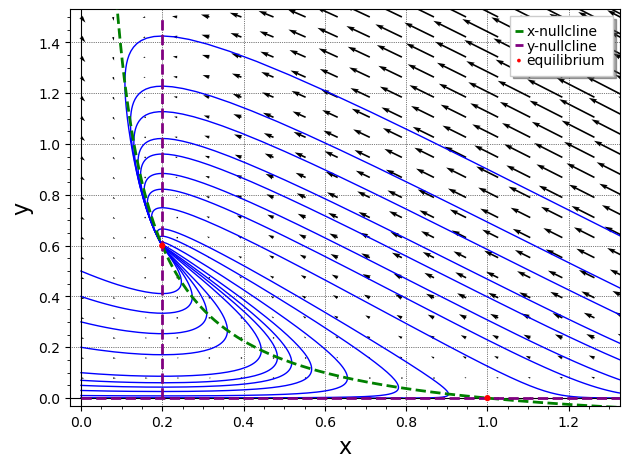

In [9]:
pt = plot_vector_field(
    [p*(1-x)-R_0*x*y, R_0*x*y-y],
    (x, 0, 1.5),(y, 0, 1.5),
    xmin=0, xmax=1.3, ymin=0, ymax=1.5, gridlines=True,
    axes_labels=[x,y],
)
pt += plot(p*(1-x) / R_0 / x, (x,0.001,1.5), linestyle="--", thickness=2, color="green", legend_label="x-nullcline", zorder=5)
pt += plot(0, (x,0.001,1.5), linestyle="--", thickness=2, color="purple", legend_label="y-nullcline", zorder=5)
pt += parametric_plot((1/R_0, y), (y,0,1.5), linestyle="--", xmin=0.001, thickness=2, color="purple", zorder=5)
pt += sum(point(p, color='red', size=20, zorder=10, **({"legend_label":"equilibrium"} if i==0 else {})) for i,p in enumerate(equilibria))
pt += sum(line(s) for s in solutions)
pt.set_aspect_ratio(1/1.6)
pt.save(save_location)
pt

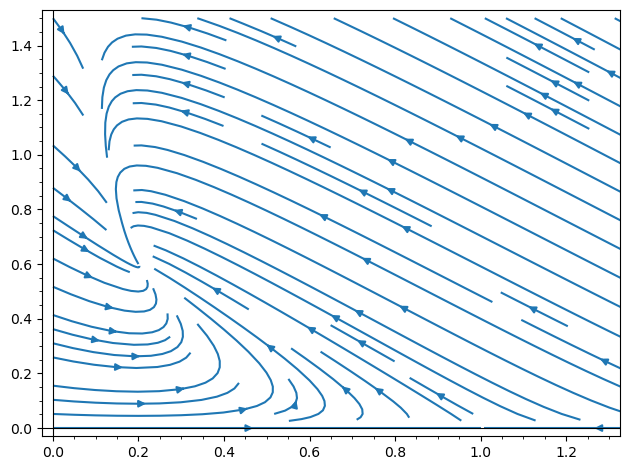

In [10]:
# cool looking
streamline_plot(
    [p*(1-x)-R_0*x*y, R_0*x*y-y],
    (x, 0, 1.5),(y, 0, 1.5),
    xmax=1.3
)

# No endemic
We have an endemic equilibrium if $R_0 > 1$. So, we look at when $R_0 < 0$

In [11]:
(x,y,t) = var('x,y,t')
p=3/4
R_0=1/2
equilibria = [(1,0),(1/R_0, p*(1-1/R_0))]
save_location="../images/SIR-demographic-phase-plane-disease-free.svg"
(p*R_0/2-1)^2 + p-1

105/256

In [12]:
def find_solution(initial):
    # https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/ode.html
    T= ode_solver(lambda t,y: [p*(1-y[0]) - R_0 * y[0]*y[1], R_0*y[0]*y[1] - y[1]],
                  t_span=(0,30), y_0=initial,
                 )
    T.ode_solve(num_points=1000)
    return [p[1] for p in T.solution] # extract x,y coordinates only
initials = [
    (0,0.00001), (0,0.001),
    (0,0.01), (0,0.03), (0,0.05), (0,0.07),
    (0,0.1), (0,0.2), (0,0.3), (0,0.4), (0,0.5),
    (1.5, 0.00001), (1.5, 0.001), (1.5, 0.01),
    (1.5, 0.05), (1.5, 0.1), (1.5, 0.2), (1.5, 0.3), (1.5, 0.5),
]
solutions = [find_solution(initial) for initial in initials]

In [13]:
solutions[0][:10]

[(0, 0.0000100000000000000),
 [0.022248761177045565, 9.706080884948546e-06],
 [0.04400251187076771, 9.423910038072187e-06],
 [0.06527226569790665, 9.152895157177592e-06],
 [0.08606879121816857, 8.892479172433437e-06],
 [0.1064026173876811, 8.642137863725452e-06],
 [0.1262840388911136, 8.401377657311437e-06],
 [0.14572312135506468, 8.169733586986332e-06],
 [0.16472970644536722, 7.946767406289265e-06],
 [0.18331341685090125, 7.732065839479596e-06]]

In [14]:
pt = plot_vector_field(
    [p*(1-x)-R_0*x*y, R_0*x*y-y],
    (x, 0, 1.5),(y, 0, 1.5),
    xmin=0, xmax=1.3, ymin=0, ymax=1.5, gridlines=True,
    axes_labels=[x,y],
)
pt += plot(p*(1-x) / R_0 / x, (x,0.001,1.5), linestyle="--", thickness=2, color="green", legend_label="x-nullcline", zorder=5)
pt += plot(0, (x,0.001,1.5), linestyle="--", thickness=2, color="purple", legend_label="y-nullcline", zorder=5)
pt += parametric_plot((1/R_0, y), (y,0,1.5), linestyle="--", xmin=0.001, thickness=2, color="purple", zorder=5)
pt += sum(point(p, color='red', size=20, zorder=10, **({"legend_label":"equilibrium"} if i==0 else {})) for i,p in enumerate(equilibria))
pt += sum(line(s) for s in solutions)
pt.set_aspect_ratio(1/1.6)
pt.save(save_location)
pt

In [15]:
# cool looking
streamline_plot(
    [p*(1-x)-R_0*x*y, R_0*x*y-y],
    (x, 0, 1.5),(y, 0, 1.5),
    xmax=1.3
)